In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("new_train.csv",parse_dates=["date"])
print(df)

                      date   Demand   Price
0      2023-07-20 00:05:00  5691.72   85.74
1      2023-07-20 00:10:00  5742.55   86.92
2      2023-07-20 00:15:00  5702.55   86.26
3      2023-07-20 00:20:00  5668.95   86.19
4      2023-07-20 00:25:00  5662.34   86.13
...                    ...      ...     ...
117787 2024-08-31 23:40:00  5871.31  110.07
117788 2024-08-31 23:45:00  5892.14  110.39
117789 2024-08-31 23:50:00  5893.49  110.07
117790 2024-08-31 23:55:00  5838.52   96.75
117791 2024-09-01 00:00:00  5799.07   77.75

[117792 rows x 3 columns]


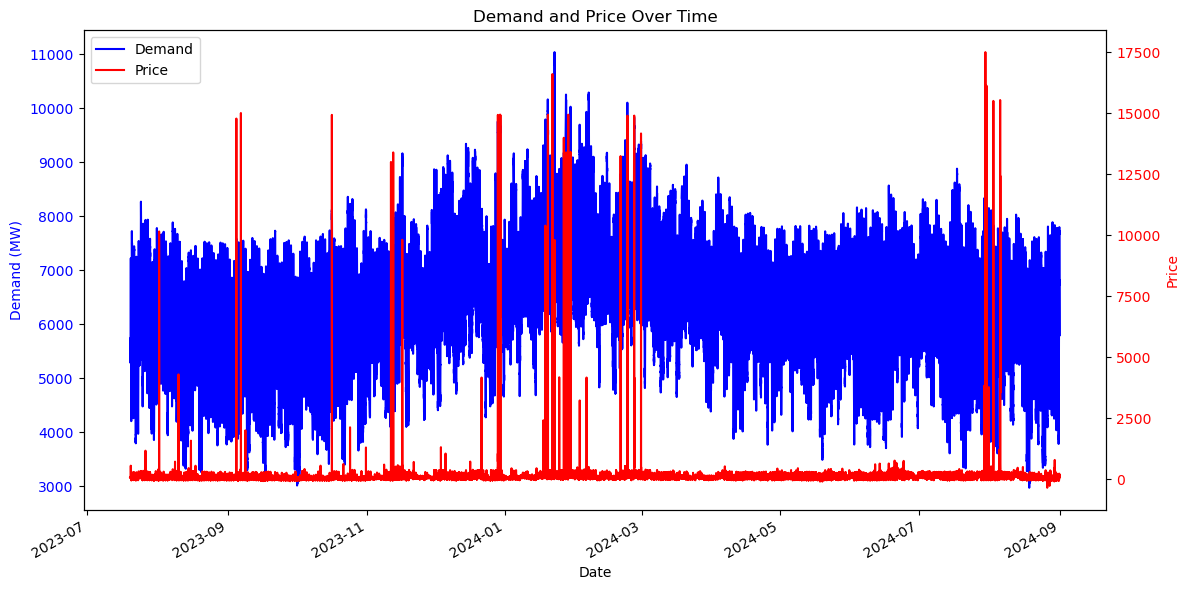

In [7]:


# 創建圖表和軸
fig, ax1 = plt.subplots(figsize=(12, 6))

# 繪製 Demand 的線
line1, = ax1.plot(df['date'], df['Demand'], color='blue', label='Demand')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand (MW)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 創建一個次座標軸用於 Price
ax2 = ax1.twinx()
line2, = ax2.plot(df['date'], df['Price'], color='red', label='Price')
ax2.set_ylabel('Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 設置標題
plt.title('Demand and Price Over Time')

# 添加圖例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# 調整 x 軸日期格式
fig.autofmt_xdate()

# 顯示圖表
plt.tight_layout()
plt.show()

In [13]:
Op_df = pd.read_csv("Actual_Demand.csv",parse_dates=["date"])
Op_Qld_df = Op_df[Op_df["Region"]=="QLD1"]
Op_Qld_df["date"] = pd.to_datetime(Op_Qld_df["date"])
Op_Qld_df

/var/folders/24/y3zl_1w92891z07g31f5wth00000gn/T/ipykernel_42699/3920460718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Op_Qld_df["date"] = pd.to_datetime(Op_Qld_df["date"])


,date,Region,OPERATIONAL_DEMAND
1,2023-07-23 00:00:00,QLD1,6057.0
6,2023-07-23 00:30:00,QLD1,5880.0
11,2023-07-23 01:00:00,QLD1,5716.0
16,2023-07-23 01:30:00,QLD1,5611.0
21,2023-07-23 02:00:00,QLD1,5543.0
...,...,...,...
94056,2024-08-17 21:30:00,QLD1,6462.0
94061,2024-08-17 22:00:00,QLD1,6289.0
94066,2024-08-17 22:30:00,QLD1,6182.0
94071,2024-08-17 23:00:00,QLD1,6097.0


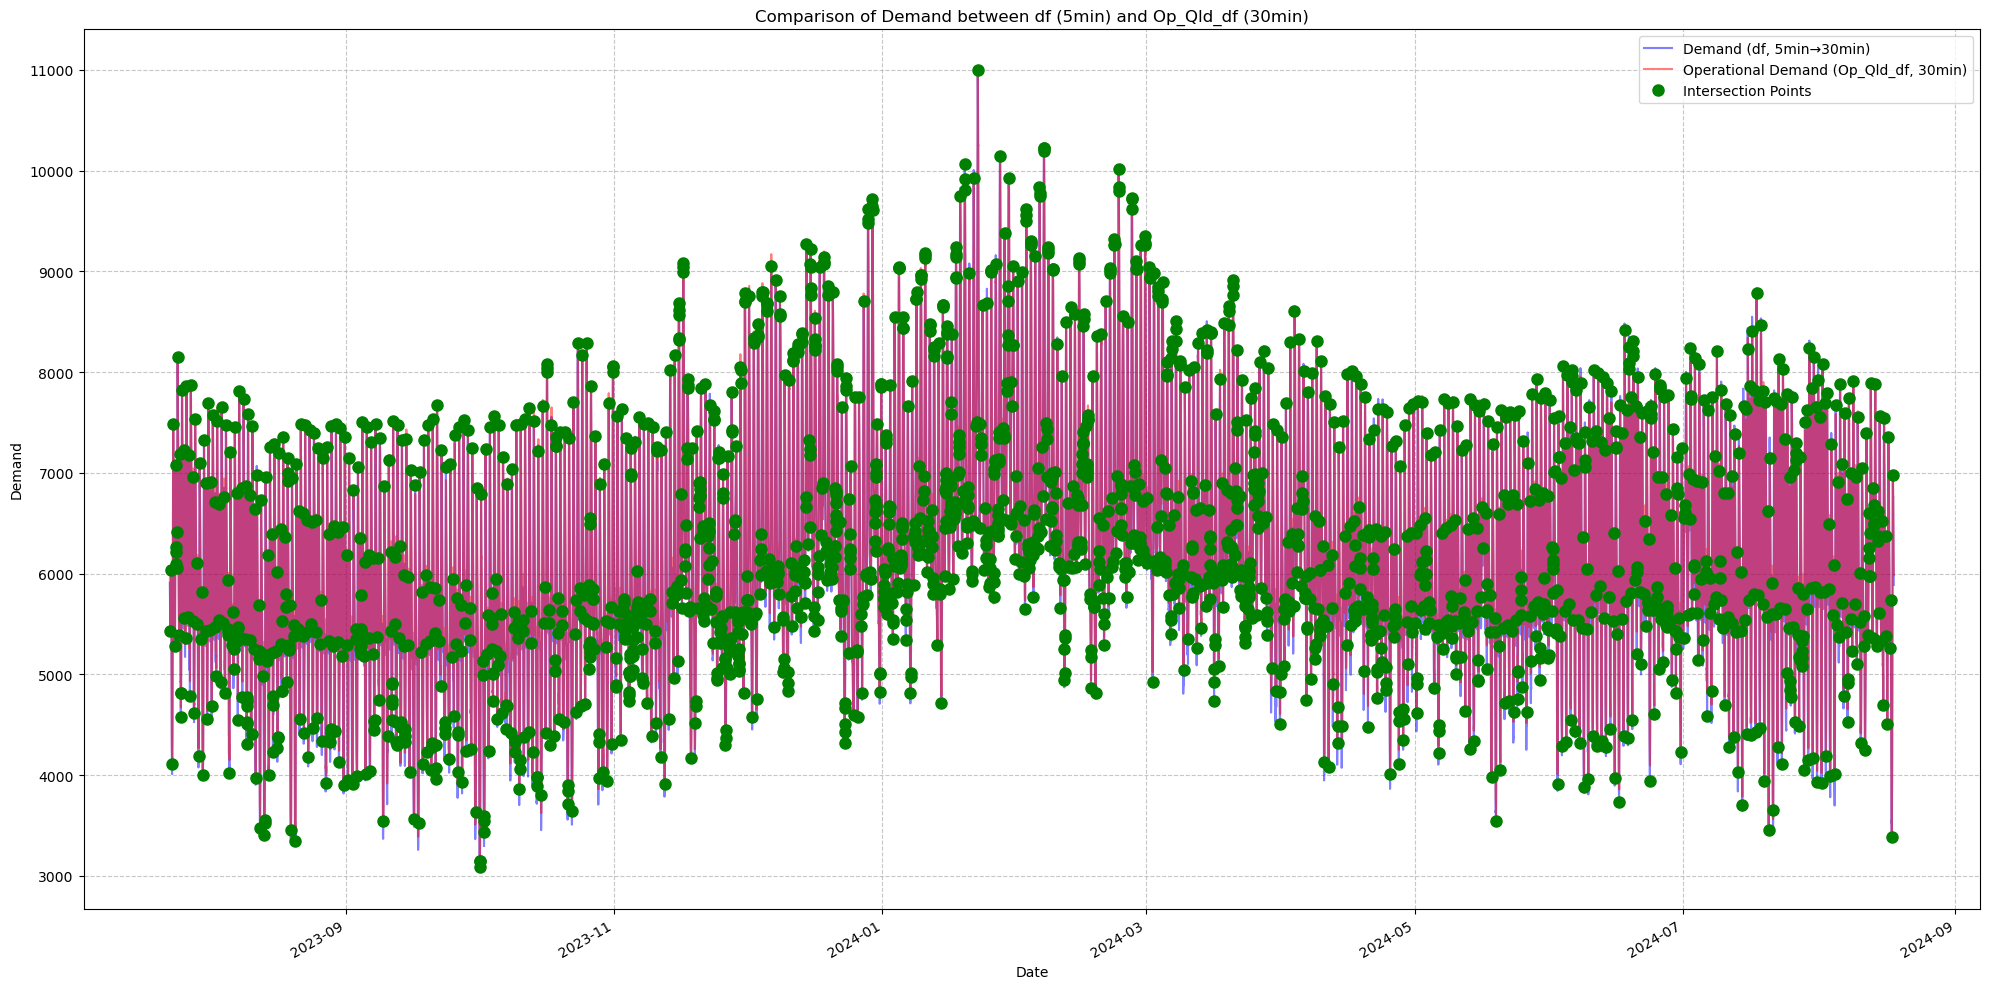

Intersection Points:
Date: 2023-07-23 03:30:00, df Demand: 5430.47, Op_Qld_df Demand: 5445.00
Date: 2023-07-23 07:00:00, df Demand: 6037.75, Op_Qld_df Demand: 6003.00
Date: 2023-07-23 13:00:00, df Demand: 4107.51, Op_Qld_df Demand: 4171.00
Date: 2023-07-23 18:30:00, df Demand: 7484.11, Op_Qld_df Demand: 7437.00
Date: 2023-07-24 03:30:00, df Demand: 5281.88, Op_Qld_df Demand: 5350.00
Date: 2023-07-24 07:00:00, df Demand: 7082.28, Op_Qld_df Demand: 6868.00
Date: 2023-07-24 10:00:00, df Demand: 6097.19, Op_Qld_df Demand: 6182.00
Date: 2023-07-24 11:00:00, df Demand: 6268.20, Op_Qld_df Demand: 6262.00
Date: 2023-07-24 11:30:00, df Demand: 6216.96, Op_Qld_df Demand: 6277.00
Date: 2023-07-24 12:30:00, df Demand: 6411.37, Op_Qld_df Demand: 6338.00
... and 2230 more intersection points.

df Demand Statistics (resampled to 30min):
count    18816.000000
mean      6175.141174
std       1118.579962
min       3071.910000
25%       5452.047500
50%       6061.829167
75%       6888.314583
max      109

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假設數據已經讀取到 df 和 Op_Qld_df 中
# df = pd.read_csv("path_to_df.csv", parse_dates=["date"])
# Op_Qld_df = pd.read_csv("path_to_Op_Qld_df.csv", parse_dates=["date"])

# 確保兩個 DataFrame 有相同的日期範圍
start_date = max(df['date'].min(), Op_Qld_df['date'].min())
end_date = min(df['date'].max(), Op_Qld_df['date'].max())

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
Op_Qld_df = Op_Qld_df[(Op_Qld_df['date'] >= start_date) & (Op_Qld_df['date'] <= end_date)]

# 將兩個數據集設置為以日期為索引
df.set_index('date', inplace=True)
Op_Qld_df.set_index('date', inplace=True)

# 將 df 重採樣到 30 分鐘間隔以匹配 Op_Qld_df
df_resampled = df['Demand'].resample('30T').mean()

# 對齊兩個數據集
aligned_df = pd.concat([df_resampled, Op_Qld_df['OPERATIONAL_DEMAND']], axis=1).dropna()

# 創建圖表
plt.figure(figsize=(20, 10))

# 繪製對齊後的數據
plt.plot(aligned_df.index, aligned_df['Demand'], label='Demand (df, 5min→30min)', color='blue', alpha=0.5)
plt.plot(aligned_df.index, aligned_df['OPERATIONAL_DEMAND'], label='Operational Demand (Op_Qld_df, 30min)', color='red', alpha=0.5)

# 找出交叉點
diff = aligned_df['Demand'] - aligned_df['OPERATIONAL_DEMAND']
intersections = np.where(np.diff(np.sign(diff)))[0]
plt.plot(aligned_df.index[intersections], aligned_df['Demand'].iloc[intersections], 'go', markersize=8, label='Intersection Points')

# 設置標籤和標題
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Comparison of Demand between df (5min) and Op_Qld_df (30min)')

# 添加圖例
plt.legend()

# 調整 x 軸日期格式
plt.gcf().autofmt_xdate()

# 顯示網格線以便更容易看清交叉點
plt.grid(True, linestyle='--', alpha=0.7)

# 顯示圖表
plt.tight_layout()
plt.show()

# 打印交叉點的信息
print("Intersection Points:")
for i in intersections[:10]:  # 只打印前10個交叉點以避免輸出過多
    print(f"Date: {aligned_df.index[i]}, df Demand: {aligned_df['Demand'].iloc[i]:.2f}, Op_Qld_df Demand: {aligned_df['OPERATIONAL_DEMAND'].iloc[i]:.2f}")

if len(intersections) > 10:
    print(f"... and {len(intersections) - 10} more intersection points.")

# 打印一些基本統計信息
print("\ndf Demand Statistics (resampled to 30min):")
print(aligned_df['Demand'].describe())
print("\nOp_Qld_df Operational Demand Statistics:")
print(aligned_df['OPERATIONAL_DEMAND'].describe())